In [19]:
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from common import Fonts, Images, NWSL

In [2]:
df = pd.read_csv("2022_2023_movement.csv")
df

,player,team_old,team_new
0,Abbey Burdette,NaN,WAS
1,Abby Boyan,NaN,CHI
2,Abby Dahlkemper,SD,SD
3,Abby Erceg,NC,LOU
4,Abby Smith,POR,NJY
...,...,...,...
411,Wasila Diwura-Soala,NaN,HOU
412,Yazmeen Ryan,POR,NJY
413,Yuki Nagasato,CHI,CHI
414,Zaneta Wyne,LOU,LOU


In [16]:
retained = (
    df[df["team_old"] == df["team_new"]]
    .groupby("team_new")
    .agg(count=("team_new", "count"))
    .sort_values("count", ascending=False)
    .reset_index()
)
retained

,team_new,count
0,HOU,24
1,POR,23
2,RGN,22
3,LOU,20
4,LA,19
5,ORL,19
6,KC,18
7,NJY,18
8,SD,18
9,WAS,17


In [43]:
traded = df[(df["team_old"] != df["team_new"]) & df["team_old"] & df["team_new"]]
traded

,player,team_old,team_new
3,Abby Erceg,NC,LOU
4,Abby Smith,POR,NJY
5,Addie McCain,KC,CHI
64,Cameron Tucker,NJY,HOU
67,Cari Roccaro,LA,CHI
72,Carson Pickett,NC,LOU
95,Courtney Petersen,ORL,HOU
99,Danielle Colaprico,CHI,SD
102,Debinha,NC,KC
107,Devon Kerr,WAS,HOU


In [65]:
new = (
    df[df["team_old"].isna()]
    .groupby("team_new")
    .agg(count=("team_new", "count"))
    .reset_index()
)
new

,team_new,count
0,CHI,15
1,HOU,13
2,KC,9
3,LA,9
4,LOU,7
5,NC,11
6,NJY,2
7,ORL,8
8,POR,5
9,RGN,4


In [66]:
old = (
    df[df["team_new"].isna()]
    .groupby("team_old")
    .agg(count=("team_old", "count"))
    .reset_index()
)
old

,team_old,count
0,CHI,7
1,HOU,5
2,KC,3
3,LA,6
4,LOU,2
5,NC,3
6,NJY,3
7,ORL,7
8,POR,2
9,RGN,5


<Figure size 720x720 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

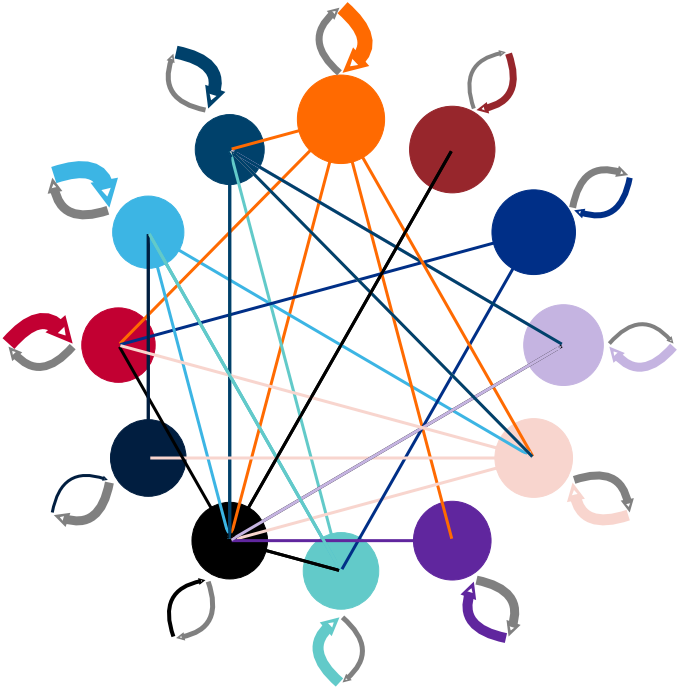

In [107]:
# Draw the plot
plt.clf()
plt.rcParams["figure.figsize"] = (10, 10)
plt.figure(dpi=200, facecolor="white")
fig, ax = plt.subplots()
fig.tight_layout()
fig.patch.set_facecolor("white")
ax.axis("off")

# Set limits
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

angles = {}
radii = {}

def get_coords(team, r=1):
    angle = angles[team]
    return (math.sin(angle) * r, math.cos(angle) * r)


# Plot teams
for i, team in retained.iterrows():
    angle = i * math.pi / 6
    angles[team["team_new"]] = angle
    x, y = get_coords(team["team_new"])
    r = 0.04 * (team["count"] ** 0.5)
    radii[team["team_new"]] = r
    ax.add_patch(
        patches.Circle(
            (x, y), r, color=NWSL.color(team["team_new"])
        )
    )

# Plot players who left the league
for i, team in old.iterrows():
    x1, y1 = get_coords(team["team_old"], 1.2)
    x2, y2 = get_coords(team["team_old"], 1.5)
    color = "gray"

    ax.add_patch(
        patches.FancyArrowPatch(
            (x1, y1),
            (x2, y2),
            connectionstyle="arc3,rad=-0.6",
            arrowstyle="-|>",
            lw=2 + team["count"],
            mutation_scale=1,
            joinstyle="miter",
            capstyle="butt",
            clip_on=False,
            color=color,
            fc=color,
        )
    )

# Plot players who joined the league
for i, team in new.iterrows():
    x1, y1 = get_coords(team["team_new"], 1.5)
    x2, y2 = get_coords(team["team_new"], 1.2)
    color = NWSL.color(team["team_new"])

    ax.add_patch(
        patches.FancyArrowPatch(
            (x1, y1),
            (x2, y2),
            connectionstyle="arc3,rad=-0.6",
            arrowstyle="-|>",
            lw=2 + team["count"],
            mutation_scale=1,
            joinstyle="miter",
            capstyle="butt",
            clip_on=False,
            color=color,
            fc=color,
        )
    )
    
# Plot trades
for i, team in traded.iterrows():
    # TODO: calculate intersection of line with circles to find actual start/end
    # and then add curved lines
    x1, y1 = get_coords(team["team_old"], 1)
    x2, y2 = get_coords(team["team_new"], 1)
    color = NWSL.color(team["team_new"])

    ax.add_patch(
        patches.FancyArrowPatch(
            (x1, y1),
            (x2, y2),
            arrowstyle="-|>",
            lw=3,
            mutation_scale=1,
            joinstyle="miter",
            capstyle="butt",
            clip_on=False,
            color=color,
            fc=color,
        )
    )